# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

### Regular expressions

Regular expressions (regex) are sequences of characters that define search patterns, primarily used for matching, searching, and manipulating text. They allow you to specify complex string patterns for tasks like validation, extraction, and replacement in text processing.

### Example: Matching 4-digit numbers**

To match exactly 4 digits, you can use the regex pattern `\b\d{4}\b`.  
- `\b` ensures a word boundary, so it won't match part of a longer number.
- `\d{4}` matches exactly four digits.

```python
import re
import requests

# Download the test text
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"
test_text = requests.get(url).text

# Find all 4-digit numbers
four_digit_numbers = re.findall(r'\b\d{4}\b', test_text)
print(four_digit_numbers)
```

### Find all words starting with "super"
```python
super_words = re.findall(r'\bsuper\w*', test_text, re.IGNORECASE)
print(super_words)
```

### Find wiki-links for test

In [4]:
import re

# The test text is read from the file
file_name = 'week4_testtext.txt'
with open(file_name, 'r') as file:
    text = file.read()

# The regular expression to find all wiki-links
pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'

# Find all matches
matches = re.findall(pattern, text)

# Print the extracted links
if matches:
    print("Found wiki-links:")
    for link, display_text in matches:
        if display_text:
            print(f"Two-part link: link='{link}', display_text='{display_text}'")
        else:
            print(f"Single-part link: link='{link}'")
else:
    print("No wiki-links found.")

Found wiki-links:
Single-part link: link='drinking vinegar'
Single-part link: link='gentrify'
Single-part link: link='hashtag'
Two-part link: link='Bicycle', display_text='Bicycle(two-wheeled type)'
Two-part link: link='Pitchfork', display_text='Pitchfork Magazine'


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

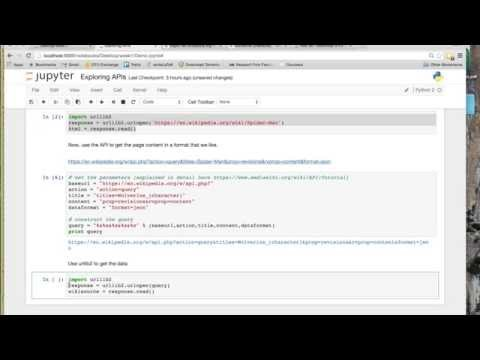

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>


In [6]:
## do the whole API thing

import urllib.request
import json

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_mainstream_rock_performers"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print("query:", query)

opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'MyApp/1.0')]
urllib.request.install_opener(opener)

wikiresponse = urllib.request.urlopen(query)
wikidata = wikiresponse.read()
wikitext = wikidata.decode('utf-8')

json.loads(wikitext)

# get the list of bands with regex from before

pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'

# List with all names
bands = []
# Find all matches
matches = re.findall(pattern, wikitext)

# Print the extracted links
if matches:
    for link, display_text in matches:
        bands.append(link)
else:
    print("No wiki-links found.")


del bands[:2]
del bands[-2:]

print("\nbands:\n")
for band in bands: 
    print(band)



query: https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_mainstream_rock_performers&format=json

bands:

10cc
10 Years (band)
3 Doors Down
311 (band)
38 Special (band)
ABBA
Accept (band)
AC/DC
Bryan Adams
Aerosmith
AFI (band)
Air Supply
The Alan Parsons Project
Alice in Chains
The All-American Rejects
The Allman Brothers Band
Alter Bridge
Ambrosia (band)
America (band)
The Animals
Adam Ant
Anthrax (American band)
April Wine
Arcade Fire
Arctic Monkeys
Asia (band)
Audioslave
Avenged Sevenfold
Awolnation
The B-52's
Bachman\u2013Turner Overdrive
Bad Company
Badfinger
The Band
The Bangles
Barenaked Ladies
Bay City Rollers
The Beach Boys
Beastie Boys
The Beatles
Bee Gees
Beck
Ben Folds Five
Pat Benatar
Chuck Berry
The Big Bopper
Billy Talent
The Black Crowes
The Black Keys
Black Sabbath
Black Stone Cherry
Black Veil Brides
Blink-182
Blondie (band)
Bloodhound Gang
Blue October
Blue \u00d6yster Cult
Blues Traveler
James Blunt
Blur (band)
Bon Jovi
Bost

In [7]:
#could also do with file but less sexy

import re

# The test text is read from the file
file_name = 'week4_wiki.txt'
with open(file_name, 'r') as file:
    text = file.read()

# The regular expression to find all wiki-links
pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'

# List with all names
bands = []

# Find all matches
matches = re.findall(pattern, text)

# Print the extracted links
if matches:
    for link, display_text in matches:
        bands.append(link)
else:
    print("No wiki-links found.")

for band in bands: 
    print(band)


10cc
10 Years (band)
3 Doors Down
311 (band)
38 Special (band)
ABBA
Accept (band)
AC/DC
Bryan Adams
Aerosmith
AFI (band)
Air Supply
The Alan Parsons Project
Alice in Chains
The All-American Rejects
The Allman Brothers Band
Alter Bridge
Ambrosia (band)
America (band)
The Animals
Adam Ant
Anthrax (American band)
April Wine
Arcade Fire
Arctic Monkeys
Asia (band)
Audioslave
Avenged Sevenfold
Awolnation
The B-52's
Bachman–Turner Overdrive
Bad Company
Badfinger
The Band
The Bangles
Barenaked Ladies
Bay City Rollers
The Beach Boys
Beastie Boys
The Beatles
Bee Gees
Beck
Ben Folds Five
Pat Benatar
Chuck Berry
The Big Bopper
Billy Talent
The Black Crowes
The Black Keys
Black Sabbath
Black Stone Cherry
Black Veil Brides
Blink-182
Blondie (band)
Bloodhound Gang
Blue October
Blue Öyster Cult
Blues Traveler
James Blunt
Blur (band)
Bon Jovi
Boston (band)
David Bowie
Bowling for Soup
The Boxtones
Boys Like Girls
Bread (band)
Breaking Benjamin
Bring Me the Horizon
Jackson Browne
Buckcherry
Jeff Buckley

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the rock performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [ ]:
## do the whole API thing

import urllib.request
import json

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'MyApp/1.0')]
urllib.request.install_opener(opener)

for band in bands[100:]: 
    band=band.replace(" ", "_")
    title = "titles=" + urllib.parse.quote(band)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    band = band.replace("/", "_") # fucking error handling for AC/DC
    band = band.replace("'", "") # more error handling for B-52's

    filename = f"week4_bands/{band}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(wikitext)

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [11]:
# for just the first page, let's get every outgoing link: 

import re
import os

# Get the list of files in the directory
band_files = os.listdir("week4_bands")

# Read the first file
for band in band_files[:4]:
    with open(os.path.join("week4_bands", band), "r", encoding="utf-8") as f:
        page_text = f.read()

    # Extract all wiki-links from the page
    pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'
    outgoing_links = re.findall(pattern, page_text)
    del outgoing_links[0]

# Print the outgoing links

    print(f"\nOutgoing links from {band[:-4]}:\n")

    # Filter out links starting with "Category:"
    filtered_links = [link for link in outgoing_links if not link[0].startswith("Category:")]

    for link, display_text in filtered_links:
        print(link)

# now we know it works for one page


Outgoing links from Funkadelic:

Plainfield, New Jersey
Funk rock
Routledge
psychedelic funk
The Guardian
acid rock
psychedelic rock
Los Angeles Times
Funkadelic discography
Westbound Records
Warner Bros. Records
Parliament-Funkadelic
The Brides of Funkenstein
Bootsy Collins
The Parliaments
George Clinton (funk musician)
Grady Thomas
Ray Davis (musician)
Clarence \"Fuzzy\" Haskins
Calvin Simon
Eddie Hazel
Tawl Ross
Billy Bass Nelson
Tiki Fulwood
Bernie Worrell
Harold Beane
Garry Shider
Cordell Mosson
William \"Bootsy\" Collins
Phelps \"Catfish\" Collins
Ron Bykowski
Prakash John
Tyrone Lampkin
Leon Patillo
Jimi Calhoun
Michael Hampton
Glen Goins
Jerome Brailey
Debbie Wright
Jeanette Washington
Dawn Silva
Walter \"Junie\" Morrison
Rodney Curtis
Mallia Franklin
Larry Fratangelo
DeWayne \"Blackbyrd\" McKnight
David Spradley
Ruth Copeland
Dennis Chambers
Sidney Barnes (musician)
funk rock
Plainfield, New Jersey
George Clinton (funk musician)
P-Funk
funk
AllMusic
the Parliaments
Parliament

In [12]:
# expand to all pages

import os
import re
import networkx as nx

# Folder with downloaded band pages
data_dir = "week4_bands"
band_files = os.listdir(data_dir)

# Clean performer names from file names (strip .txt, etc.)
performers = [band_file[:-4] for band_file in band_files]

# Regex pattern to extract wiki-style links [[target|display]]
pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'

# Initialize directed graph
G = nx.DiGraph()

# Loop through all pages
for band_file in band_files:
    band_name = band_file[:-4]

    with open(os.path.join(data_dir, band_file), "r", encoding="utf-8") as f:
        page_text = f.read()

    # Count words in page (simple split is OK for our purpose)
    word_count = len(re.findall(r"\b\w+\b", page_text))

    # Add node with attribute
    G.add_node(band_name, content_length=word_count)

    # Extract outgoing links
    outgoing_links = re.findall(pattern, page_text)

    # Drop the first one (the page header link)
    if outgoing_links:
        outgoing_links = outgoing_links[1:]

    # Keep only links pointing to other performers
    for target, display in outgoing_links:
        if target in performers:
            G.add_edge(band_name, target)

# Remove truly isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Extract the largest weakly connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

print(f"Final network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Inspect a few nodes and edges
print("\nSample nodes with attributes:")
for node, data in list(G.nodes(data=True))[:5]:
    print(node, data)

print("\nSample edges:")
for edge in list(G.edges())[:10]:
    print(edge)


Final network has 426 nodes and 1381 edges.

Sample nodes with attributes:
Funkadelic {'content_length': 2978}
Parliament-Funkadelic {'content_length': 5275}
AllMusic {'content_length': 2166}
Slayer {'content_length': 26396}
Metallica {'content_length': 35346}

Sample edges:
('Funkadelic', 'Parliament-Funkadelic')
('Funkadelic', 'AllMusic')
('Parliament-Funkadelic', 'Funkadelic')
('Parliament-Funkadelic', 'AllMusic')
('Slayer', 'Metallica')
('Slayer', 'Megadeth')
('Slayer', 'AllMusic')
('Slayer', 'Sepultura')
('Slayer', 'Pantera')
('Slayer', 'Volbeat')


*Excercise*: 
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>
# Documentation: Crawling the Rock Performers Network

Below is a short reproducible write-up you can paste into a notebook. It describes what I did step by step, notes the trickiest parts, explains how I used an LLM, and lists what I would do differently next time.

---

#### 1) Step-by-step process (how I crawled the network)

1. Prepare data

   * Put all downloaded Wikipedia page texts into a folder, i.e. `week4_bands/`.
   * Build the performer list from file names, e.g. `performers = [os.path.splitext(f)[0] for f in os.listdir(data_dir)]`.

2. Parse outgoing wiki-links from one page (debugging)

   * Use a regex to find wiki-style links of the form `[[target|display]]` or `[[target]]`. Example pattern I used:

   ```python
   pattern = r'\[\[([^|]+?)(?:\|(.+?))?\]\]'
   ```

   * Test the regex on a single file and inspect matches to make sure it captures target and optional display text.

3. Scale to all pages and build a directed graph

   * Initialize `G = nx.DiGraph()`.
   * For each file:

     * Read the page text.
     * Compute a word count using a regex like `len(re.findall(r'\b\w+\b', page_text))` and add node attributes, e.g. `G.add_node(title, content_length=word_count)`.
     * Extract all outgoing links with the regex. Optionally drop the first match if it is the self/header link.
     * Normalize each `target` (strip fragment after `#`, trim whitespace, handle underscores/spaces).
     * Filter out non-article links such as those that start with `Category:`, `File:`, `Help:`, etc.
     * Keep the edge only if the normalized `target` matches a performer in the `performers` set. Then `G.add_edge(source, target)`.

4. Clean the graph

   * Remove truly isolated nodes (no in- and out-degree) using `nx.isolates(G)` and `G.remove_nodes_from(...)`.
   * Extract the largest weakly connected component:

   ```python
   largest_cc = max(nx.weakly_connected_components(G), key=len)
   G = G.subgraph(largest_cc).copy()
   ```

5. Save results and inspect

   * Save graph to disk (GraphML, GEXF, or pickle) and print summary stats: number of nodes, edges, sample nodes with attributes.

---

#### 2) Which part was the most difficult

* Matching link targets to performers reliably. Wikipedia link text is messy: links can include anchors (`#Section`), pipes with alternate display text, redirects, parentheticals, punctuation, different capitalization, underscores vs spaces, and aliases. A link might point to a disambiguation page instead of the performer, or the performer file name might use a slightly different canonical form than the link text. Handling these name-normalization and disambiguation issues was the main source of errors and required careful filtering and checks.

Other annoyances:

* Many non-article links (`Category:`, `File:`) and templates that needed filtering.
* The initial heuristic of removing the first match to avoid the self-link can be brittle if pages differ in structure.
* Counting words in the presence of markup can slightly overcount; stripping markup yields a more accurate measurement.

---

#### 3) How I used LLMs to help me

* I used an LLM to draft and refine the regex for extracting wiki-links and to suggest safer variants that handle pipes and anchors.
* The LLM helped craft a robust normalization function (e.g. strip `#fragment`, replace underscores, trim whitespace, case normalization) and to list common namespace prefixes to filter out (`Category:`, `File:`, `Template:`, `Help:`, `Portal:`).
* I used the LLM to translate the step-by-step process into clear notebook-friendly documentation and to suggest best-practice improvements, such as saving intermediate mappings and how to extract the largest weakly connected component with NetworkX.
* I used the LLM for debugging guidance when the first-pass graph had apparently isolated nodes (suggesting checks for naming mismatches and redirects).

---

#### 4) What I would do differently next time

* Use a real wiki parser or the Wikipedia API: tools like `mwparserfromhell` or `wikipedia` / the MediaWiki API give canonical page titles and resolve redirects, which is far more robust than pure regex on raw wikitext.
* Normalize names with a canonical mapping: build a `title_map` where keys are normalized variants and values are canonical performer titles so aliasing and capitalization differences are handled.
* Strip wiki markup before counting words: remove templates, infoboxes, and markup so `content_length` more closely reflects readable words.
* Improve filtering: treat anchor links by dropping the `#fragment`, ignore namespaces thoroughly, and skip disambiguation pages. Optionally follow redirects via the API to find the real target.
* Save intermediate artifacts: write the extracted link list and node attributes to a CSV/JSON so I can inspect mismatches and re-run cleaning steps without repeating the full crawl.
* Add tests: a small unit test that asserts that known performer A links to performer B and that known non-article links are filtered out.
* Scale and speed: if the data set is large, parallelize file parsing (multiprocessing) and stream results to disk.
* Add richer metadata: store `num_outgoing`, `num_incoming`, source file path, and possibly a small excerpt of the page as node attributes.

---

#### Quick reproducibility checklist

* Requirements: `python`, `networkx`, optionally `mwparserfromhell` for robust parsing.
* Data: folder `week4_bands/` with one text file per performer. Filenames should reflect performer titles, e.g. `The_Beatles.txt` or use `os.path.splitext`.
* Run: the main loop above to build `G`, then clean isolates and extract the largest weakly connected component. Save `G` to a file for later analysis.

---



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

Number of nodes: 426
Number of links: 1381


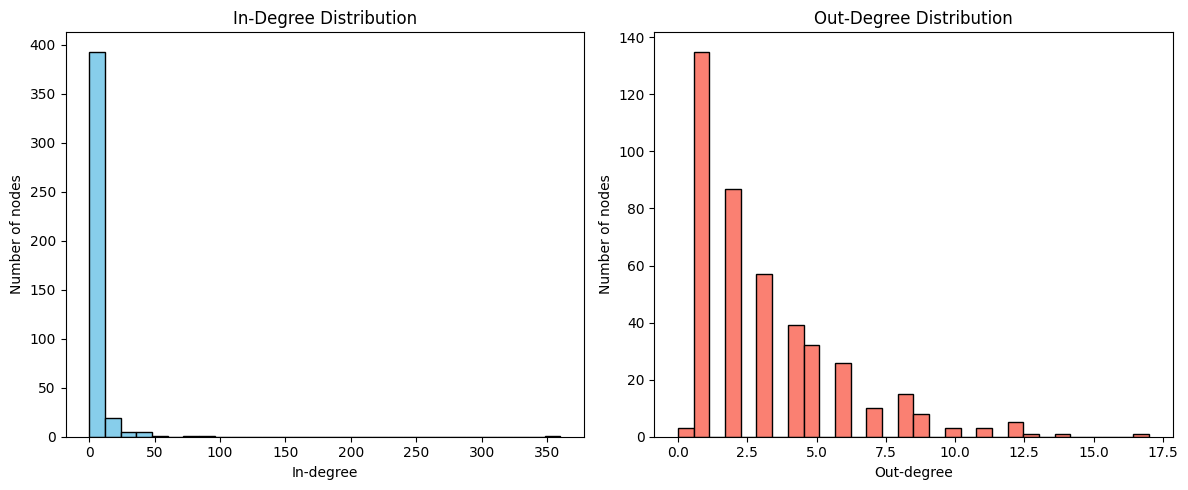

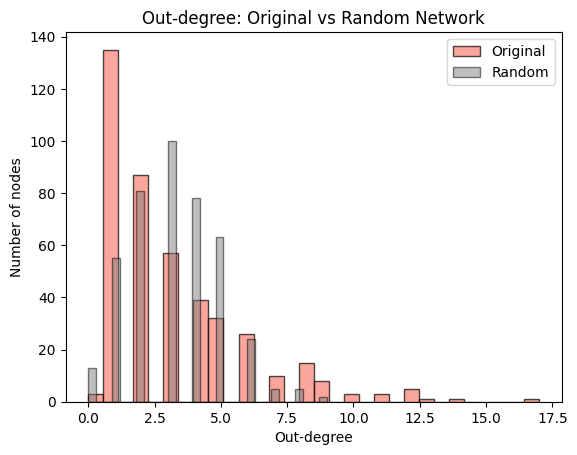

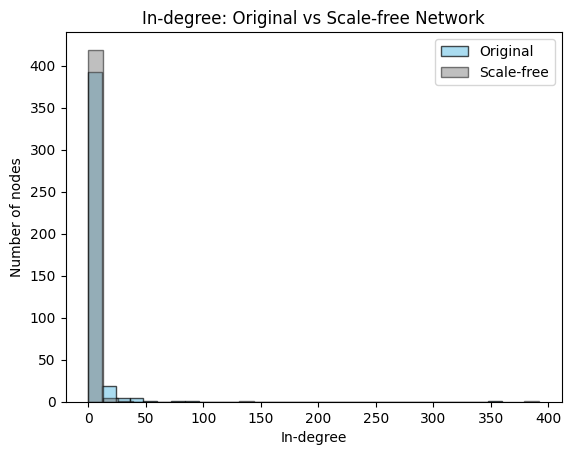

Top 5 nodes by in-degree (most cited/linked-to):
AllMusic: 360
Metallica: 85
U2: 74
Aerosmith: 49
Soundgarden: 47

Top 5 nodes by out-degree (most linking/citing):
Alice_in_Chains: 17
Staind: 14
Limp_Bizkit: 13
Metallica: 12
Linkin_Park: 12

10 pages with longest content:
Guns_N'_Roses: 61522 words
Guns_N_Roses: 61522 words
Coldplay: 47629 words
Queen_(band): 46995 words
Marilyn_Manson_(band): 46682 words
The_Rolling_Stones: 44709 words
U2: 43676 words
Paul_McCartney: 43606 words
Bob_Dylan: 43255 words
David_Bowie: 43103 words


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# ------------------------
# 1. Number of nodes and links
# ------------------------
num_nodes = G.number_of_nodes()
num_links = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of links:", num_links)

# ------------------------
# 2. In-degree and out-degree distributions
# ------------------------
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(in_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("In-Degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Number of nodes")

plt.subplot(1,2,2)
plt.hist(out_degrees, bins=30, color='salmon', edgecolor='black')
plt.title("Out-Degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Number of nodes")

plt.tight_layout()
plt.show()

# ------------------------
# 2a. Compare out-degree to random network

# ------------------------
G_random = nx.gnm_random_graph(n=num_nodes, m=num_links, directed=True)
random_out_degrees = [d for n, d in G_random.out_degree()]

plt.hist(out_degrees, bins=30, alpha=0.7, label='Original', color='salmon', edgecolor='black')
plt.hist(random_out_degrees, bins=30, alpha=0.5, label='Random', color='gray', edgecolor='black')
plt.title("Out-degree: Original vs Random Network")
plt.xlabel("Out-degree")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()

# ------------------------
# 2b. Compare in-degree to scale-free network
# ------------------------
G_sf = nx.scale_free_graph(n=num_nodes)
sf_in_degrees = [d for n, d in G_sf.in_degree()]

plt.hist(in_degrees, bins=30, alpha=0.7, label='Original', color='skyblue', edgecolor='black')
plt.hist(sf_in_degrees, bins=30, alpha=0.5, label='Scale-free', color='gray', edgecolor='black')
plt.title("In-degree: Original vs Scale-free Network")
plt.xlabel("In-degree")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()

# ------------------------
# 3. Top 5 most connected performers
# ------------------------
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by in-degree (most cited/linked-to):")
for node, deg in top_in:
    print(f"{node}: {deg}")

print("\nTop 5 nodes by out-degree (most linking/citing):")
for node, deg in top_out:
    print(f"{node}: {deg}")

# ------------------------
# 4. 10 pages with longest content
# ------------------------
page_lengths = {node: data['content_length'] for node, data in G.nodes(data=True)}
longest_pages = sorted(page_lengths.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n10 pages with longest content:")
for page, length in longest_pages:
    print(f"{page}: {length} words")


# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

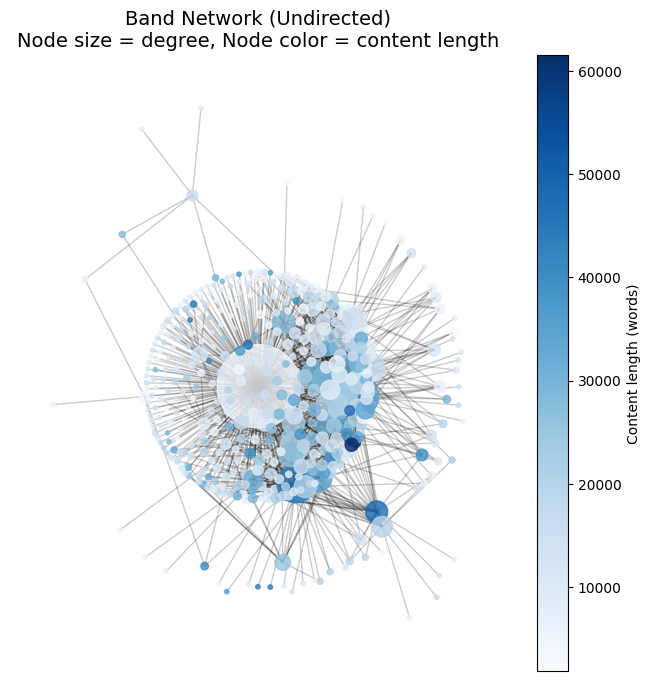

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# ------------------------
# 1. Convert to undirected graph
# ------------------------
G_undirected = G.to_undirected()

# ------------------------
# 2. Node attributes
# ------------------------
degrees = dict(G_undirected.degree())
node_sizes = [degrees[n]*10 for n in G_undirected.nodes()]

content_lengths = nx.get_node_attributes(G_undirected, "content_length")
node_colors = [content_lengths[n] for n in G_undirected.nodes()]

# ------------------------
# 3. Layout and plotting
# ------------------------
fig, ax = plt.subplots(figsize=(8, 8))

pos = nx.kamada_kawai_layout(G_undirected)

nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.Blues,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.2, ax=ax)

# add colorbar properly bound to ax
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.Blues,
    norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Content length (words)")

ax.set_title("Band Network (Undirected)\nNode size = degree, Node color = content length", fontsize=14)
ax.axis("off")
plt.show()


Conversion step:

G_undirected = G.to_undirected() keeps all edges but ignores directionality → good for visualization.

The original G (directed) is preserved for degree analysis.

Node size vs color:

Size = degree → highlights hubs (bands that are well connected).

Color = content length → shows which bands have longer Wikipedia pages.

Layouts:

nx.kamada_kawai_layout → good at minimizing energy quickly.

If the plot looks messy, try two-stage layout (Kamada–Kawai init → spring layout refine):

In [ ]:
import pandas as pd

# Save edges
edges_df = nx.to_pandas_edgelist(G)
edges_df.to_csv("edges.csv", index=False)

# Save node attributes (optional)
nodes_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient="index")
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={"index": "node"}, inplace=True)
nodes_df.to_csv("nodes.csv", index=False)
